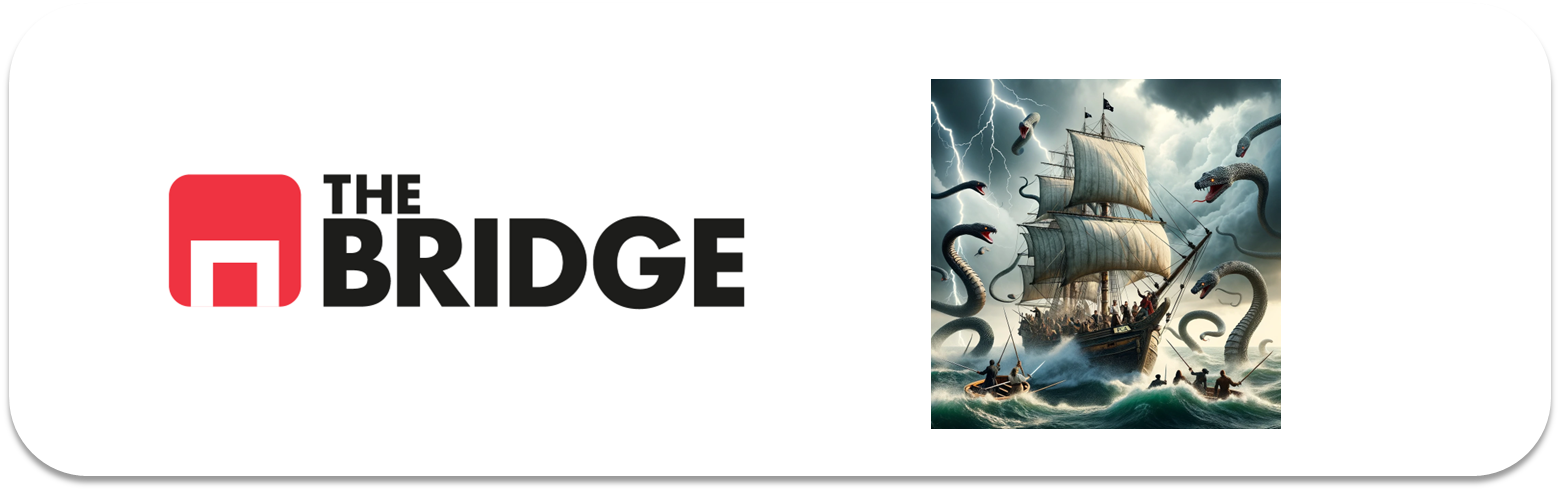

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [621]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from lightgbm import LGBMClassifier
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.metrics import mutual_info_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [622]:
df_bank = pd.read_csv("./data/credit_npo.csv")

In [623]:
df_bank.head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [624]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [625]:
df_bank.dropna(inplace=True)

In [626]:
df_bank.nunique()

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10314
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11472
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64

NumberOfTime30-59DaysPastDueNotWorse --98 max
NumberOfOpenCreditLinesAndLoans--49
NumberOfTimes90DaysLate--98                
NumberRealEstateLoansOrLines--49
NumberOfTime60-89DaysPastDueNotWorse --98
NumberOfDependents --10

In [627]:
#Voy a utilizar esta funcion para categorizar y cambiar los valores del data 

def categorize_values(df, column_name):
    def categorize(value):
        if value >= 0 and value <= 30:
            return 0
        elif value >= 31 and value <= 60:
            return 1
        elif value >= 61:
            return 2

    df[column_name] = df[column_name].apply(categorize)
    return df

In [628]:
#NumberOfTime30-59DaysPastDueNotWorse --98 max

categorize_values(df_bank, "NumberOfTime30-59DaysPastDueNotWorse")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [629]:
#NumberOfOpenCreditLinesAndLoans
def categorize_values_2(df, column_name):
    def categorize(value):
        if value >= 0 and value <= 15:
            return 0
        elif value >= 16 and value <= 30:
            return 1
        elif value >= 31:
            return 2

    df[column_name] = df[column_name].apply(categorize)
    return df

In [630]:
categorize_values_2(df_bank, "NumberOfOpenCreditLinesAndLoans")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,0,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,0,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,0,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,0,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,0,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,0,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,0,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,0,0,0,0,1.0


In [631]:
#NumberOfTimes90DaysLate

categorize_values(df_bank, "NumberOfTimes90DaysLate")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,0,0,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,0,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,0,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,0,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,0,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,0,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,0,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,0,0,0,0,1.0


In [632]:
#NumberRealEstateLoansOrLines

categorize_values_2(df_bank, "NumberRealEstateLoansOrLines")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,0,0,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,0,0,0,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,0,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,0,0,0,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,0,0,0,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,0,0,0,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,0,0,0,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,0,0,0,0,1.0


In [633]:
#NumberOfTime60-89DaysPastDueNotWorse
categorize_values(df_bank,"NumberOfTime60-89DaysPastDueNotWorse")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,0,0,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,0,0,0,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,0,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,0,0,0,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,0,0,0,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,0,0,0,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,0,0,0,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,0,0,0,0,1.0


In [634]:
#NumberOfDependents

def categorize_values_3(df, column_name):
    def categorize(value):
        if value >= 0 and value <= 3:
            return 0
        elif value >= 4 and value <= 6:
            return 1
        elif value >= 7:
            return 2

    df[column_name] = df[column_name].apply(categorize)
    return df

In [635]:
categorize_values_3(df_bank,"NumberOfDependents")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,0,0,0,0,0
1,0,0.023413,74,0,0.209197,4870.0,0,0,0,0,0
2,0,0.000000,43,0,0.080784,5000.0,0,0,0,0,0
3,0,0.492754,44,0,0.412735,7333.0,0,0,0,0,0
4,0,1.000000,63,0,0.000000,8333.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,0,0,0,0,0
12533,0,0.036726,62,0,0.884985,5833.0,0,0,0,0,0
12534,0,0.120313,49,0,0.577676,6333.0,0,0,0,0,0
12535,0,0.252566,63,0,0.037640,14000.0,0,0,0,0,0


In [636]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  int64  
dtypes: float64(3), int64

SeriousDlqin2yrs                       Target
RevolvingUtilizationOfUnsecuredLines  
age   
DebtRatio      
MonthlyIncome                                                                                

In [637]:
df_bank["RevolvingUtilizationOfUnsecuredLines"].max()

6.0

In [638]:
def categorize_values_4(df, column_name):
    def categorize(value):
        if value >= 0 and value <= 0.33:
            return 0
        elif value >= 0.34 and value <= 0.66:
            return 1
        elif value >= 0.67:
            return 2

    df[column_name] = df[column_name].apply(categorize)
    return df

In [639]:
categorize_values_4(df_bank, "RevolvingUtilizationOfUnsecuredLines")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.0,37,0,0.070709,5656.0,0,0,0,0,0
1,0,0.0,74,0,0.209197,4870.0,0,0,0,0,0
2,0,0.0,43,0,0.080784,5000.0,0,0,0,0,0
3,0,1.0,44,0,0.412735,7333.0,0,0,0,0,0
4,0,2.0,63,0,0.000000,8333.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.0,59,0,0.290216,5140.0,0,0,0,0,0
12533,0,0.0,62,0,0.884985,5833.0,0,0,0,0,0
12534,0,0.0,49,0,0.577676,6333.0,0,0,0,0,0
12535,0,0.0,63,0,0.037640,14000.0,0,0,0,0,0


In [640]:
#age 
df_bank["age"].max()

101

In [641]:
categorize_values(df_bank,"age")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.0,1,0,0.070709,5656.0,0,0,0,0,0
1,0,0.0,2,0,0.209197,4870.0,0,0,0,0,0
2,0,0.0,1,0,0.080784,5000.0,0,0,0,0,0
3,0,1.0,1,0,0.412735,7333.0,0,0,0,0,0
4,0,2.0,2,0,0.000000,8333.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.0,1,0,0.290216,5140.0,0,0,0,0,0
12533,0,0.0,2,0,0.884985,5833.0,0,0,0,0,0
12534,0,0.0,1,0,0.577676,6333.0,0,0,0,0,0
12535,0,0.0,2,0,0.037640,14000.0,0,0,0,0,0


In [642]:
#DebtRatio
categorize_values_4(df_bank, "DebtRatio")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.0,1,0,0.0,5656.0,0,0,0,0,0
1,0,0.0,2,0,0.0,4870.0,0,0,0,0,0
2,0,0.0,1,0,0.0,5000.0,0,0,0,0,0
3,0,1.0,1,0,1.0,7333.0,0,0,0,0,0
4,0,2.0,2,0,0.0,8333.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.0,1,0,0.0,5140.0,0,0,0,0,0
12533,0,0.0,2,0,2.0,5833.0,0,0,0,0,0
12534,0,0.0,1,0,1.0,6333.0,0,0,0,0,0
12535,0,0.0,2,0,0.0,14000.0,0,0,0,0,0


In [643]:
#MonthlyIncome
df_bank["MonthlyIncome"].median()

5416.0

In [644]:

def categorize_values5(df, column_name):
    def categorize(value):
        if value >= 0 and value <= 5500:
            return 0
        elif value >= 5501 and value <= 10500:
            return 1
        elif value >= 10501:
            return 2

    df[column_name] = df[column_name].apply(categorize)
    return df

In [645]:
categorize_values5(df_bank,"MonthlyIncome")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.0,1,0,0.0,1,0,0,0,0,0
1,0,0.0,2,0,0.0,0,0,0,0,0,0
2,0,0.0,1,0,0.0,0,0,0,0,0,0
3,0,1.0,1,0,1.0,1,0,0,0,0,0
4,0,2.0,2,0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.0,1,0,0.0,0,0,0,0,0,0
12533,0,0.0,2,0,2.0,1,0,0,0,0,0
12534,0,0.0,1,0,1.0,1,0,0,0,0,0
12535,0,0.0,2,0,0.0,2,0,0,0,0,0


In [646]:
def fill_na_with_mean(df):
    for column in df.columns:
        if df[column].dtype in [np.float64, np.int64]:  # Comprobar si la columna es numérica
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
    return df

In [647]:
fill_na_with_mean(df_bank)

C:\Users\raul_\AppData\Local\Temp\ipykernel_25392\4171022504.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.0,1,0,0.0,1,0,0,0,0,0
1,0,0.0,2,0,0.0,0,0,0,0,0,0
2,0,0.0,1,0,0.0,0,0,0,0,0,0
3,0,1.0,1,0,1.0,1,0,0,0,0,0
4,0,2.0,2,0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.0,1,0,0.0,0,0,0,0,0,0
12533,0,0.0,2,0,2.0,1,0,0,0,0,0
12534,0,0.0,1,0,1.0,1,0,0,0,0,0
12535,0,0.0,2,0,0.0,2,0,0,0,0,0


In [648]:
target = "SeriousDlqin2yrs"

In [649]:
train_set, test_set = train_test_split(df_bank, test_size = 0.2, random_state= 42)

In [650]:
df_bank.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  int64  
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  int64  
dtypes: float64(2), int64

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 


Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

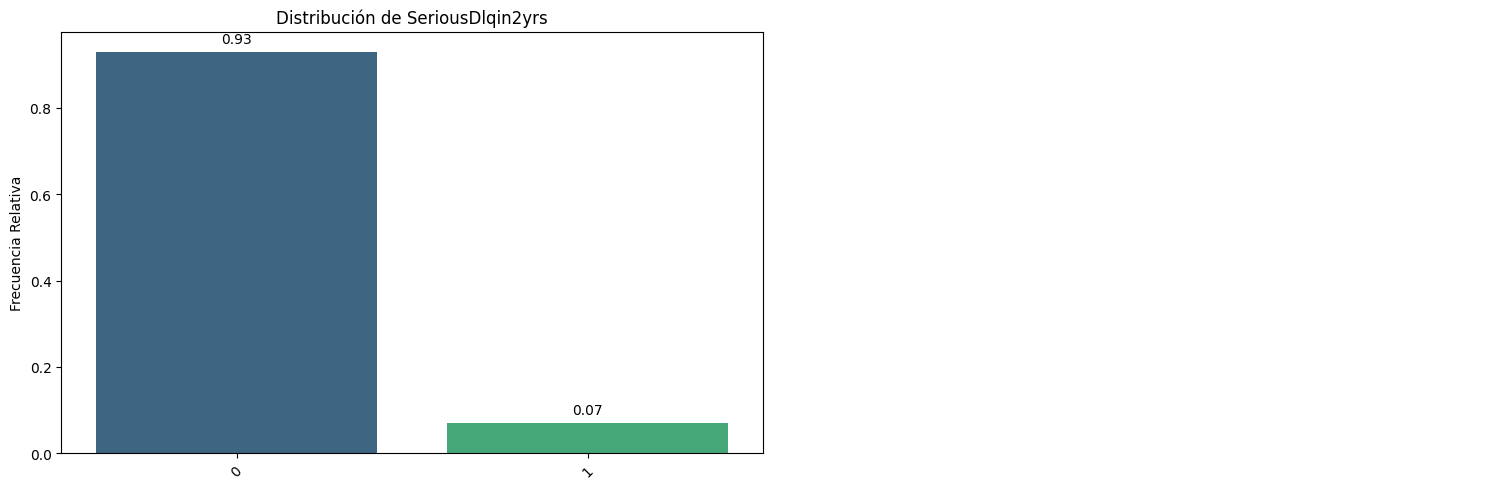

In [651]:
bt.pinta_distribucion_categoricas(train_set, [target], True, True)

In [652]:
features_num = df_bank.columns.to_list()
features_num.remove("SeriousDlqin2yrs")


<Axes: >

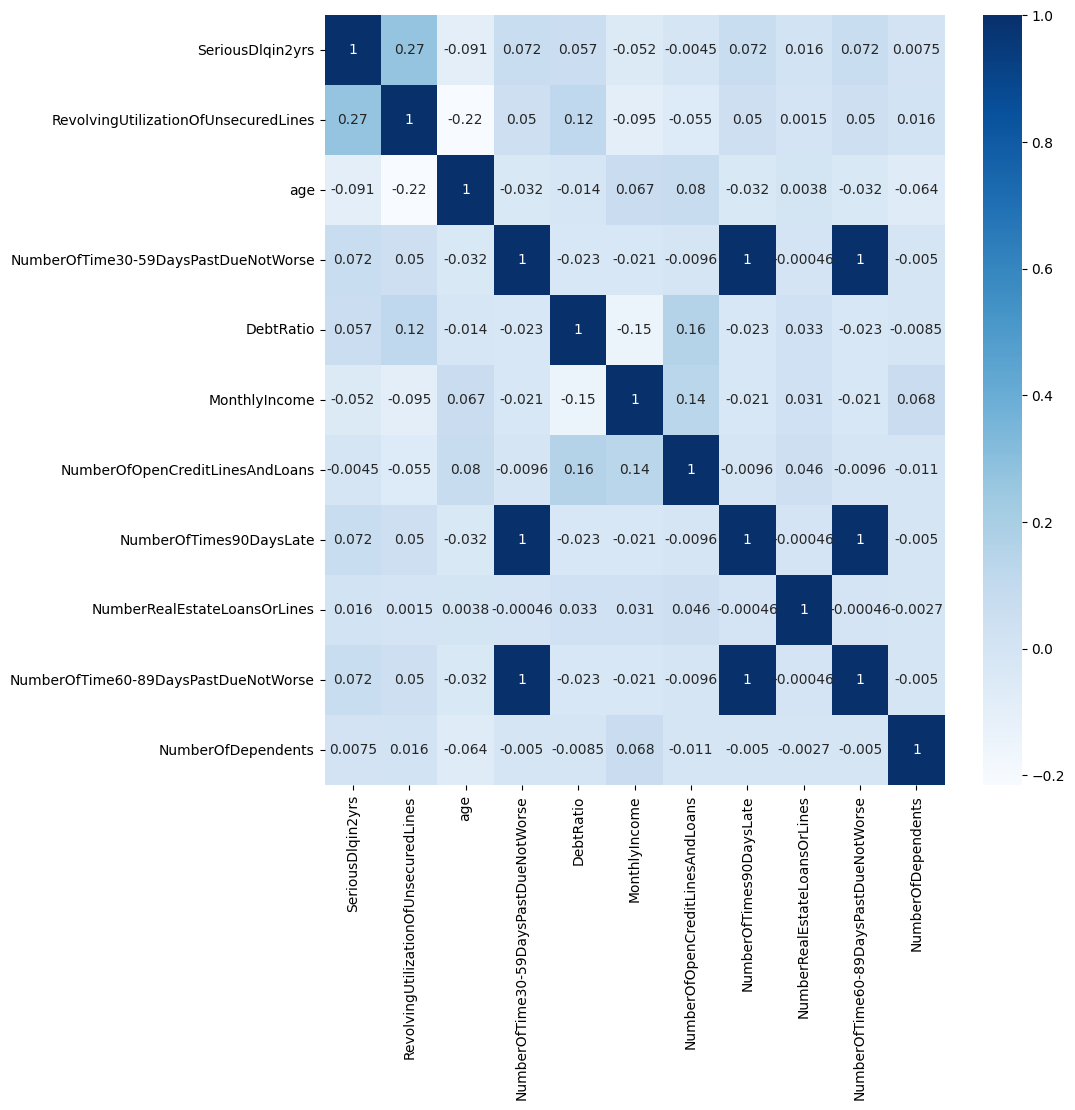

In [653]:

plt.figure(figsize=(10,10))
sns.heatmap(df_bank.corr(), annot= True, cmap= "Blues")

Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information

In [654]:
X_train = df_bank[features_num]
y_train = df_bank["SeriousDlqin2yrs"]
selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
0,0.0,1.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0
4,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...
11811,0.0,1.0,0.0,0.0,0.0
11812,0.0,2.0,0.0,0.0,0.0
11813,0.0,1.0,0.0,0.0,0.0
11814,0.0,2.0,0.0,0.0,0.0


    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [655]:
X = df_bank.drop("SeriousDlqin2yrs", axis=1)
y = df_bank['SeriousDlqin2yrs']

In [656]:
from sklearn.linear_model import LinearRegression

In [657]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [658]:
selector = SelectFromModel(model)
selector.fit(X, y)

SelectFromModel(estimator=LinearRegression())

In [659]:
selected_features_SFM = X.columns[selector.get_support()]

In [660]:
selected_features_SFM

Index(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

Selección de las mejores features empleando RFE.

In [661]:
from sklearn.feature_selection import RFE

In [662]:
estimator = LinearRegression()

In [663]:
selector = RFE(estimator, n_features_to_select=6, step=1)

In [664]:
selector = selector.fit(X, y)

In [665]:
selected_features_RFE = X.columns[selector.support_]

In [666]:
selected_features_RFE

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

    5. Selección de las mejores features empleando SFS.


In [667]:
from sklearn.feature_selection import SequentialFeatureSelector

In [668]:
selector = SequentialFeatureSelector(estimator, n_features_to_select=6, direction='forward')


In [669]:
selector = selector.fit(X, y)


In [670]:
selected_features_SFS = X.columns[list(selector.support_)]


In [671]:
selected_features_SFS

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfTimes90DaysLate'],
      dtype='object')

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [672]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

In [673]:
selected_features = {
    'RFE': selected_features_RFE,
    'SFS': selected_features_SFS,
    "SFM": selected_features_SFM
}

In [674]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [675]:
results = {}

for model_name, model in models.items():
    for feature_selection_method, features in selected_features.items():
        X_selected = X[features]
        recall_scores = cross_val_score(model, X_selected, y, cv=5, scoring='recall')
        avg_recall = recall_scores.mean()
        results[(model_name, feature_selection_method)] = avg_recall

In [676]:
best_model, best_features = max(results, key=results.get)
best_recall = results[(best_model, best_features)]

In [677]:
print("Mejor modelo:", best_model)
print("Mejor selección de características:", best_features)
print("Recall medio:", best_recall)

Mejor modelo: Random Forest
Mejor selección de características: SFS
Recall medio: 0.00963855421686747


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.